# Benchmark of expression level

This notebook benchmark the expression level with other methods

In [28]:
import gzip
#from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Replicates (rep1 vs. rep2)

In [17]:
m = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
m1 = m[list(filter(lambda x: x.startswith("20220719_K562R3."), m.columns))]
m2 = m[list(filter(lambda x: x.startswith("20220729_K562R3."), m.columns))]
print(len(m1.columns), len(m2.columns))

58 70


Pearson r = 0.9684883176155336


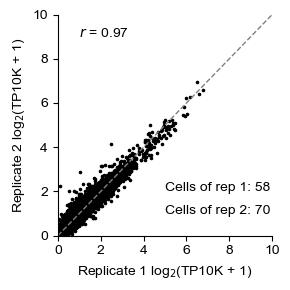

In [18]:
s1 = m1.sum(axis=1) # counts
s2 = m2.sum(axis=1)

xs = s1 * 1e4 / sum(s1) # TP10K
ys = s2 * 1e4 / sum(s2)
r = scipy.stats.pearsonr(xs, ys)[0]
print("Pearson r =", r)

lim = 10
step = 2
plt.figure(figsize=(3, 3))
plt.scatter(np.log2(xs + 1), np.log2(ys + 1), marker=".", s=10, color="black")
# sns.kdeplot(x=xs, y=ys, fill=True, cmap='Blues', cbar=False, alpha=1, zorder=2)
plt.plot([0, lim], [0, lim], lw=1, ls="--", color="grey")
plt.text(1, lim * 0.9, "$\it{r}$ = %.2f" % r)
plt.text(lim * 0.5, lim * 0.2, "Cells of rep 1: %d" % len(m1.columns))
plt.text(lim * 0.5, lim * 0.1, "Cells of rep 2: %d" % len(m2.columns))
plt.xlim(0, lim)
plt.ylim(0, lim)
plt.xticks(np.arange(0, lim + 1, step))
plt.yticks(np.arange(0, lim + 1, step))
plt.xlabel("Replicate 1 log$_2$(TP10K + 1)")
plt.ylabel("Replicate 2 log$_2$(TP10K + 1)")
for loc in ["top", "right"]:
    plt.gca().spines[loc].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.K562.run1_vs_run2.pdf")

## 2. Treatment (control vs. experiment)

In [19]:
m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
m2 = pd.read_csv("results/K562_counts.50uM_3h.105cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
print(len(m1.columns), len(m2.columns))

190 105


Pearson r = 0.9808170570477995


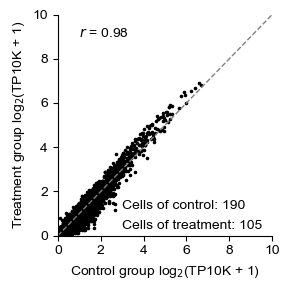

In [20]:
m = pd.concat([m1.sum(axis=1), m2.sum(axis=1)], axis=1).fillna(0)
s1, s2 = m[0], m[1] # counts

xs = s1 * 1e4 / sum(s1)
ys = s2 * 1e4 / sum(s2)
r = np.corrcoef(xs, ys)[0][1]
print("Pearson r =", r)

lim = 10
step = 2
plt.figure(figsize=(3, 3))
plt.scatter(np.log2(xs + 1), np.log2(ys + 1), marker=".", s=10, color="black")
plt.plot([0, lim], [0, lim], lw=1, ls="--", color="grey")
plt.text(1, lim * 0.9, "$\it{r}$ = %.2f" % r)
plt.text(lim * 0.3, lim * 0.12, "Cells of control: %d" % len(m1.columns))
plt.text(lim * 0.3, lim * 0.03, "Cells of treatment: %d" % len(m2.columns))
plt.xlim(0, lim)
plt.ylim(0, lim)
plt.xticks(np.arange(0, lim + 1, step))
plt.yticks(np.arange(0, lim + 1, step))
plt.xlabel("Control group log$_2$(TP10K + 1)")
plt.ylabel("Treatment group log$_2$(TP10K + 1)")
for loc in ["top", "right"]:
    plt.gca().spines[loc].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.K562.0uM_vs_50uM.pdf")

## 3. bulk RNA-seq (FLAIR-seq vs. RNA-seq)

In [21]:
m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.read_based.tsv", sep="\t", header=0, index_col=0)
m2 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", header=0, index_col=0)
m3 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi2_based.tsv", sep="\t", header=0, index_col=0)
ms = [m1, m2, m3]

In [22]:
m0 = pd.read_csv("../../4_RNAseq_ActD/results/expression/fpkm/20221128_K562_Actd_0h_rep1.human.tsv", sep="\t", index_col=0)
m0 = m0[(m0["Canonical"]) & (m0["GeneType"] == "protein_coding")]
m0 = m0[~m0["GeneID"].duplicated()]
m0.index = m0["GeneID"]
s0 = m0["FPKM"]

--------------------------------------------------------------------------------
read_based
(raw) pearsonr: PearsonRResult(statistic=0.7837076068781013, pvalue=0.0)
(raw) spearmanr: SignificanceResult(statistic=0.794788637203155, pvalue=0.0)
(log2) pearsonr: PearsonRResult(statistic=0.8010024171953333, pvalue=0.0)
(log2) spearmanr: SignificanceResult(statistic=0.794788637203155, pvalue=0.0)
--------------------------------------------------------------------------------
umi_based
(raw) pearsonr: PearsonRResult(statistic=0.8009167539645045, pvalue=0.0)
(raw) spearmanr: SignificanceResult(statistic=0.853570271488107, pvalue=0.0)
(log2) pearsonr: PearsonRResult(statistic=0.8611874544129291, pvalue=0.0)
(log2) spearmanr: SignificanceResult(statistic=0.853570271488107, pvalue=0.0)
--------------------------------------------------------------------------------
umi2_based
(raw) pearsonr: PearsonRResult(statistic=0.8004879792335043, pvalue=0.0)
(raw) spearmanr: SignificanceResult(statistic=0.

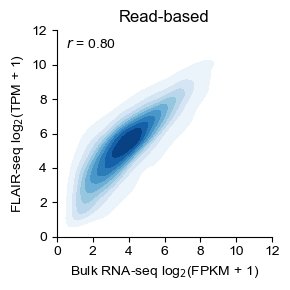

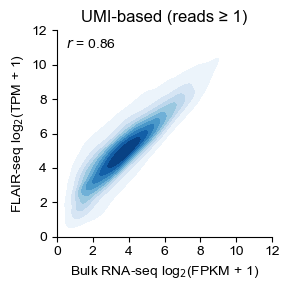

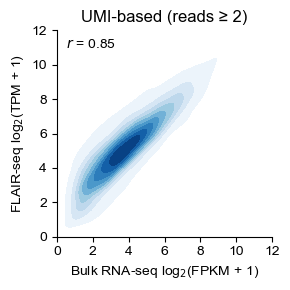

In [24]:
names = ["read_based", "umi_based", "umi2_based"]
for i, m in enumerate(ms):
    print("-" * 80)
    print(names[i])
    m = ms[i]
    s = m.sum(axis=1)
    s = s * 1e6 / sum(s)
    s.name = "TPM"
    m = pd.concat([s0, s], axis=1).fillna(0)
    m = m[(m["FPKM"] >= 1) & (m["TPM"] >= 1)]
    
    xs = m["FPKM"]
    ys = m["TPM"]
    r = np.corrcoef(xs, ys)[0][1]
    print("(raw) pearsonr:", scipy.stats.pearsonr(xs, ys))
    print("(raw) spearmanr:", scipy.stats.spearmanr(xs, ys))
    xs = np.log2(xs + 1)
    ys = np.log2(ys + 1)
    r = np.corrcoef(xs, ys)[0][1]
    print("(log2) pearsonr:", scipy.stats.pearsonr(xs, ys))
    print("(log2) spearmanr:", scipy.stats.spearmanr(xs, ys))
    
    plt.figure(figsize=(3, 3))
    if i == 0:
        title = "Read-based"
    elif i == 1:
        title = "UMI-based (reads ≥ 1)"
    else:
        title = "UMI-based (reads ≥ 2)"
    plt.title(title)
    # plt.scatter(xs, ys, marker=".", color=plt.colormaps["RdYlBu_r"](0), zorder=1)
    sns.kdeplot(x=xs, y=ys, fill=True, cmap='Blues', cbar=False, alpha=1, zorder=2)
    # plt.plot([0, 12], [0, 12], lw=1, ls="--", color="grey")
    plt.text(0.5, 11, "$\it{r}$ = %.2f" % r)
    plt.xlim(0, 12)
    plt.ylim(0, 12)
    plt.xticks(np.arange(0, 13, 2))
    plt.yticks(np.arange(0, 13, 2))
    plt.xlabel("Bulk RNA-seq log$_2$(FPKM + 1)")
    plt.ylabel("FLAIR-seq log$_2$(TPM + 1)")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("figures/correlation.flair_seq_vs_bulk_rna_seq.scatter.%s.pdf" % names[i])

## 4. SCAN-seq2 (FLAIR-seq vs. SCAN-seq2)

In [25]:
anno_gene = pd.read_csv("~/species/homo_sapiens/GRCh38.p13/gencode.v39.genes.tsv", sep="\t")
gid2gname = {gid: gname for gid, gname in anno_gene[["GeneID", "GeneName"]].values}

In [26]:
m = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", index_col=0)
m = m[["_" not in x for x in m.index]]
d = m.sum(axis=1).to_frame()
d.index.name = "GeneID"
d.columns = ["UMIs"]
d["TPM"] = d["UMIs"] * 1e6 / d["UMIs"].sum()
d["GeneName"] = [gid2gname[gid] for gid in d.index]
d = d[~d["GeneName"].duplicated()]

In [29]:
tmp = pd.read_csv(gzip.open("../../5_SCANseq2/data/GSE203561_RAW/GSM6176324_gene_counts_UMI_100.txt.gz", "rt"), sep="\t", index_col=0)
tmp = tmp[[x == x.upper() for x in tmp.index]]
tmp = tmp[tmp.columns[tmp.sum(axis=0) > 50000]]

In [30]:
d2 = tmp.sum(axis=1).to_frame()
d2.index.name = "GeneName"
d2.columns=["SCANseq2"]
d3 = d.merge(d2, left_on="GeneName", right_index=True)

12364 0.7484716695188817
12364 0.7484716695188817
12364 0.8469706912039795
PearsonRResult(statistic=0.8469706912039792, pvalue=0.0)


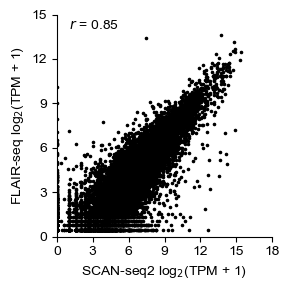

In [31]:
xs = d3["SCANseq2"]
ys = d3["TPM"]
r1 = np.corrcoef(xs, ys)[0][1]
print(len(xs), r1)

flags = (xs >= 0) & (ys >= 0)
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(len(xs), r2)

xs = np.log2(xs + 1)
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(len(xs), r3)
print(scipy.stats.pearsonr(xs, ys))

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# plt.plot([0, 15], [0, 15], color="red")
plt.text(1, 14, "$\it{r}$ = %.2f" % r3)
plt.xlim(0, 15)
plt.ylim(0, 12)
plt.xlabel("SCAN-seq2 log$_2$(TPM + 1)")
plt.ylabel("FLAIR-seq log$_2$(TPM + 1)")
plt.xticks([0, 3, 6, 9, 12, 15, 18])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.flair_seq_vs_scan_seq2.pdf")

## 5. NASC-seq (FLAIR-seq vs. NASC-seq)

In [32]:
# FLAIR-seq
m1 = pd.read_csv("results/K562_counts.0uM_3h.190cells.umi_based.tsv", sep="\t", header=0, index_col=0)
s1 = m1.sum(axis=1)
s1 = s1 * 1e6 / sum(s1)
s1.name = "FLAIR-seq"

# NASC-seq
d = pd.read_excel("../../2_NASCseq/data/NASCseq.xlsx")
d = d[(d["s4U"] == 0) & (d["Time"] == 3) & (d["Layout"] == "PE")]
print(len(d))

39


In [33]:
array = []
for run, cell in d[["Run", "Cell"]].values:
    path = "../../2_NASCseq/results/expression/fpkm/%s/%s.tsv" % (run, cell)
    tmp = pd.read_csv(path, sep="\t", index_col=0)
    tmp = tmp[tmp["Canonical"]]
    tmp = tmp[tmp["GeneType"] == "protein_coding"]
    tmp = tmp[~tmp["GeneID"].duplicated()]
    tmp.index = tmp["GeneID"]
    s = tmp["FPKM"]
    s.name = cell
    array.append(s)
m = pd.concat(array, axis=1)
s2 = m.mean(axis=1)
s2.name = "NASC-seq"

19862 0.7276358169330853
19862 0.7276358169330853
19862 0.8259353863789753


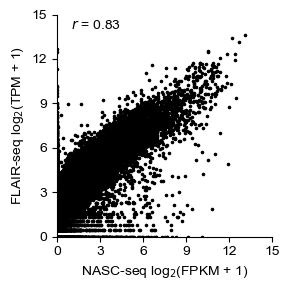

In [34]:
m = pd.concat([s1, s2], axis=1).fillna(0)
m = m[m.max(axis=1) > 0]

xs = m["NASC-seq"]
ys = m["FLAIR-seq"]

r1 = np.corrcoef(xs, ys)[0][1]
print(len(xs), r1)

flags = (xs >= 0) & (ys >= 0)
xs = xs[flags]
ys = ys[flags]
r2 = np.corrcoef(xs, ys)[0][1]
print(len(xs), r2)

xs = np.log2(xs + 1)
ys = np.log2(ys + 1)
r3 = np.corrcoef(xs, ys)[0][1]
print(len(xs), r3)

plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".", s=10, color="black")
# plt.plot([0, 15], [0, 15], color="red")
plt.text(1, 14, "$\it{r}$ = %.2f" % r3)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel("NASC-seq log$_2$(FPKM + 1)")
plt.ylabel("FLAIR-seq log$_2$(TPM + 1)")
plt.xticks([0, 3, 6, 9, 12, 15])
plt.yticks([0, 3, 6, 9, 12, 15])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/correlation.flair_seq_vs_nasc_seq.pdf")